In [148]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.feature_extraction import text # to create custom stop words
from sklearn.preprocessing import FunctionTransformer # makes functions into a inputable parameter in a pipeline! 

# helper functions for nlp eda counts
from nlp_helper_functions import punctuation_cntr, Lcase_counter, Ucase_counter

In [34]:
df_main = pd.read_csv('../data/cleaned_main.csv')
df_main.head()

,selftext,title,target
0,There are a lot of chauvinists in the U S who ...,Is Kamala Harris more at risk of assassination...,0
1,Let me explain The name of your movement shoul...,A push labeled Let mothers hold their babies,0
2,I have read about some horrific pit bull attac...,Why don t we see politicians supporting pit bu...,0
3,Some international observers have argued that ...,What threat does EU expansion pose towards Russia,0
4,Every definition of the term implies cheating ...,Why is gerrymandering legal,0


In [35]:
print(df_main['selftext'].isnull().sum())
df_main.dropna(inplace=True)
print(df_main['selftext'].isnull().sum())

19
0


In [36]:
# creating X and y for model 
X = df_main['selftext']
y = df_main['target']

In [37]:
# baseline accuracy (what we want to perform better)
y.value_counts(normalize=True)

0    0.503281
1    0.496719
Name: target, dtype: float64

Because of the careful cleaning we have a evenly split dataset that we want to perform better than just having a 50% chance of guessing whether a post is from the Conspiracy subreddit versus AskPolitics subreddit.

In [38]:
# splitting data assuming this dataset represents generally all posts on each subreddit
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,stratify=y)

best score 0.7791245791245792
best params {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.3}
train score 0.9858585858585859
test score 0.8125


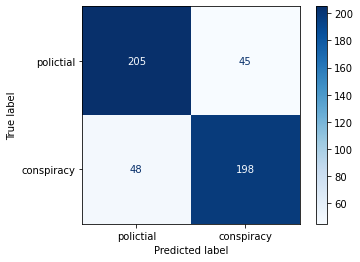

In [42]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('model', LogisticRegression())    
])
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.1, 0.2, 0.3, 0.4] # chose 1 the first time and then can maybe try higher magnitude values
}
gs2 = GridSearchCV(pipe, hyper_params,cv=3)
gs2.fit(X_train,y_train)
print('best score',gs2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs2.best_params_)
print('train score',gs2.score(X_train,y_train))
print('test score',gs2.score(X_test,y_test))
plot_confusion_matrix(gs2,X_test,y_test,cmap='Blues',display_labels=['polictial','conspiracy']); 

best score 0.7791245791245792
best params {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.3}
train score 0.9858585858585859
test score 0.8125


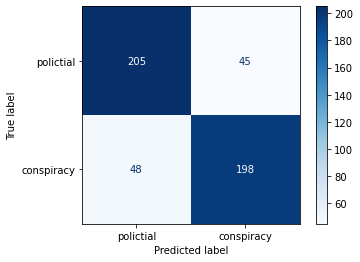

In [ ]:
#(1,3) - potential overfitting, time consuming, more features 
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.1, 0.2, 0.3, 0.4] # chose 1 the first time and then can maybe try higher magnitude values
}
gs2 = GridSearchCV(pipe, hyper_params,cv=3)
gs2.fit(X_train,y_train)
print('best score',gs2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs2.best_params_)
print('train score',gs2.score(X_train,y_train))
print('test score',gs2.score(X_test,y_test))
plot_confusion_matrix(gs2,X_test,y_test,cmap='Blues',display_labels=['polictial','conspiracy']); 

best score 0.7811447811447811
best params {'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.5}
train score 0.98989898989899
test score 0.8104838709677419


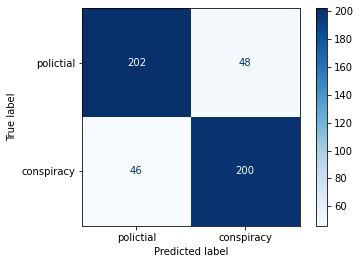

In [ ]:
#(1,3) - potential overfitting, time consuming, more features 
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [ 0.3, 0.4,0.5,0.6] # chose 1 the first time and then can maybe try higher magnitude values
}
gs3 = GridSearchCV(pipe, hyper_params,cv=3)
gs3.fit(X_train,y_train)
print('best score',gs3.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs3.best_params_)
print('train score',gs3.score(X_train,y_train))
print('test score',gs3.score(X_test,y_test))
plot_confusion_matrix(gs3,X_test,y_test,cmap='Blues',display_labels=['polictial','conspiracy']); 

0.7750841750841752
{'cvec__binary': True, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'model__C': 0.1}
train score 0.960942760942761
test score 0.7943548387096774


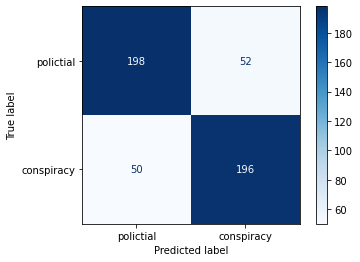

In [40]:
pipe = Pipeline([
    ('cvec',CountVectorizer()),
    ('model', LogisticRegression(max_iter=1_000))    
])
# using default solver = lbfgs rest need to be altered b/c of convergence issues
hyper_params = {
    'cvec__stop_words': [None, 'english'],
    'cvec__ngram_range':[(1,1), (1,3), (1,3)],
    'cvec__binary': [False, True],
    'model__C' : [1.0, 0.1, 0.001, 0.0001] # chose 1 the first time and then can maybe try higher magnitude values
}
gs = GridSearchCV(pipe, hyper_params,cv=3)
gs.fit(X_train,y_train)
print(gs.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print(gs.best_params_)
print('train score',gs.score(X_train,y_train))
print('test score',gs.score(X_test,y_test))
plot_confusion_matrix(gs,X_test,y_test,cmap='Blues',display_labels=['polictial','conspiracy']); 

best score 0.7717171717171718
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.8, 'cvec__max_features': 2500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'model__C': 0.6}
train score 0.9838383838383838
test score 0.7923387096774194


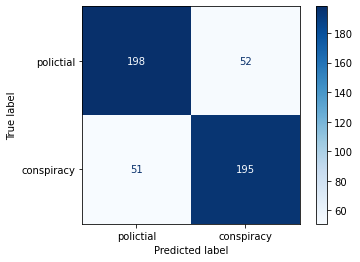

In [10]:
pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(solver='liblinear'))])
# running with liblinear
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.8,0.7,0.65],
    'cvec__max_features':[1500,2000,2500],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [0.5,0.6,0.7] # chose 1 the first time and then can maybe try higher magnitude values
}

gs41 = GridSearchCV(pipe1, hyper_params,cv=3)
gs41.fit(X_train,y_train)
print('best score',gs41.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs41.best_params_)
print('train score',gs41.score(X_train,y_train))
print('test score',gs41.score(X_test,y_test))
plot_confusion_matrix(gs41,X_test,y_test,cmap='Blues',display_labels=['polictial','conspiracy']);  


--- 
Combining title + self text

In [23]:
df_main.head()

,selftext,title,target
0,There are a lot of chauvinists in the U S who ...,Is Kamala Harris more at risk of assassination...,0
1,Let me explain The name of your movement shoul...,A push labeled Let mothers hold their babies,0
2,I have read about some horrific pit bull attac...,Why don t we see politicians supporting pit bu...,0
3,Some international observers have argued that ...,What threat does EU expansion pose towards Russia,0
4,Every definition of the term implies cheating ...,Why is gerrymandering legal,0


(1981,)
best score 0.8417508417508417
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.8, 'cvec__max_features': 2500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.5}
train score 0.9885521885521885
test score 0.8669354838709677


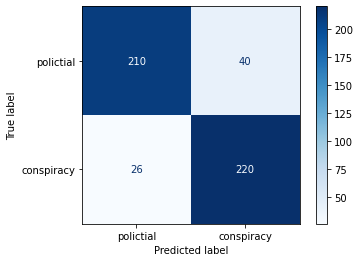

In [122]:
X3 =  df_main['title'] + ' ' +df_main['selftext'] # eliminates redundancy
print(X3.shape)
y1 = df_main['target']
X_vtrain_all, X_vtest_all, y_vtrain_all, y_vtest_all = train_test_split(X3,y1,random_state=42 ,stratify=y1 )

pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10_000))])
# running with liblinear
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.8,0.7,0.65],
    'cvec__max_features':[1500,2000,2500],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1)],
    'cvec__binary': [False, True],
    'model__C' : [0.5,0.6,0.7] # chose 1 the first time and then can maybe try higher magnitude values
}

gs_all1 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_all1.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_all1.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_all1.best_params_)
print('train score',gs_all1.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_all1.score(X_vtest_all,y_vtest_all))


plot_confusion_matrix(gs_all1,X_vtest_all,y_vtest_all,cmap='Blues',display_labels=['polictial','conspiracy']);

(1981,)
best score 0.8451178451178452
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.9, 'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4}
train score 0.9858585858585859
test score 0.8729838709677419


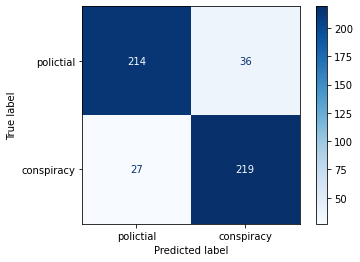

In [123]:
X3 =  df_main['title'] + ' ' +df_main['selftext'] # eliminates redundancy
print(X3.shape)
y1 = df_main['target']
X_vtrain_all, X_vtest_all, y_vtrain_all, y_vtest_all = train_test_split(X3,y1,random_state=42 ,stratify=y1 )

pipe1  = Pipeline([('cvec', CountVectorizer()),
                ('model', LogisticRegression(max_iter=10_000))])
# running with liblinear
hyper_params = {
    'cvec__stop_words': [None, 'english'], 
    'cvec__max_df':[0.9,0.8,0.85,],
    'cvec__max_features':[2000,2500,3000],
    'cvec__lowercase':[True,False],
    'cvec__ngram_range':[(1,1),(1,2),(1,3)],
    'cvec__binary': [False, True],
    'model__C' : [0.3,0.4,0.5,0.6] # chose 1 the first time and then can maybe try higher magnitude values
}

gs_all2 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_all2.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_all2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_all2.best_params_)
print('train score',gs_all2.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_all2.score(X_vtest_all,y_vtest_all))


plot_confusion_matrix(gs_all2,X_vtest_all,y_vtest_all,cmap='Blues',display_labels=['polictial','conspiracy']);

(1485, 3000)


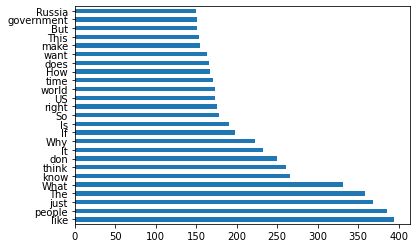

In [127]:
# looking at top words in best params for from gridsearch above

# instantiate a vectorizer with parameters from grid search above
cvec3 = CountVectorizer(stop_words='english', binary=True,lowercase =False,
                        max_df= 0.9, max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec3 = cvec3.fit_transform(X_vtrain_all,y_vtrain_all)

# Convert X_train into a DataFrame.
Xcv3_df = pd.DataFrame(Xcvec3.todense(),columns=cvec3.get_feature_names())
Xcv3_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');

In [140]:
series=Xcv3_df.sum().sort_values(ascending = False).head(25)
top25=list(series.index)
print(type(top25))
print(top25)

<class 'list'>
['like', 'people', 'just', 'The', 'What', 'know', 'think', 'don', 'It', 'Why', 'If', 'Is', 'So', 'right', 'US', 'world', 'time', 'How', 'does', 'want', 'make', 'This', 'But', 'government', 'Russia']


In [141]:
# create a custom stop words based on these above 
stop_words = text.ENGLISH_STOP_WORDS.union(top25)

best score 0.8451178451178452
best params {'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.75, 'cvec__max_features': 3000, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4}
train score 0.9858585858585859
test score 0.8729838709677419


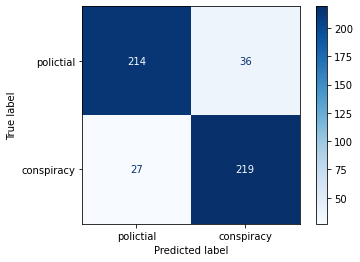

In [143]:
# running with same inital pipe for Logistic Reg model (pipe1_)
hyper_params = {
    'cvec__stop_words': [stop_words, 'english'],  # introducing custom stop words
    'cvec__max_df':[0.75,0.8], # 0.8 for prev iterations
    'cvec__max_features':[2500,2750,3000], # best features were b/w 2500-3000 
    'cvec__lowercase':[False], # best params were False for previous 2 iterations
    'cvec__ngram_range':[(1,1),(1,2)], # best params were (1,1) for previous times
    'cvec__binary': [True], # best params were True for previous 2 iterations
    'model__C' : [0.4,0.45,0.5] # best params were 0.4-0.5 both previous times
}

gs_all3 = GridSearchCV(pipe1, hyper_params,cv=3)
gs_all3.fit(X_vtrain_all,y_vtrain_all)

print('best score',gs_all3.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_all3.best_params_)
print('train score',gs_all3.score(X_vtrain_all,y_vtrain_all))
print('test score',gs_all3.score(X_vtest_all,y_vtest_all))


plot_confusion_matrix(gs_all3,X_vtest_all,y_vtest_all,cmap='Blues',display_labels=['polictial','conspiracy']);

<class 'list'>
['going', 've', 'They', 'years', 'way', 'And', 'really', 'war', 'Ukraine', 'say', 'good', 'did', 'actually', 'Biden', 'things', 'country', 'political', 'In', 'new', 'believe', 'amp', 'state', 'said', 'lot', 'thing']


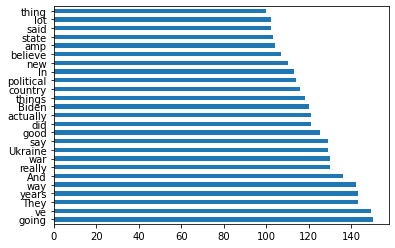

In [147]:
# looking at top words in best params for from gridsearch above

# instantiate a vectorizer with parameters from grid search above
cvec = CountVectorizer(stop_words=stop_words, binary=True,lowercase =False,
                        max_df= 0.75, max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec = cvec.fit_transform(X_vtrain_all,y_vtrain_all)

# Convert X_train into a DataFrame.
Xcv3_df = pd.DataFrame(Xcvec.todense(),columns=cvec.get_feature_names())
Xcv3_df.sum().sort_values(ascending = False).head(25).plot(kind = 'barh');
series_2=Xcv3_df.sum().sort_values(ascending = False).head(25)
top25_2=list(series_2.index)
print(type(top25_2))
print(top25_2)

In [ ]:
# gs_all1
'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.9, 'cvec__max_features': 3000, 
'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4

# gs_all2 
'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.8, 'cvec__max_features': 2500, 
'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.5

# gs_all3
'cvec__binary': True, 'cvec__lowercase': False, 'cvec__max_df': 0.75, 'cvec__max_features': 3000, 
'cvec__ngram_range': (1, 1), 'cvec__stop_words': 'english', 'model__C': 0.4

---
creating text and punctuation count as features for seltftext and title (based on last vectorization parameters)

In [217]:
X3_all = df_main[['selftext','title','target']].copy()
y1 = df_main['target']

X3_vtrain_all, X3_vtest_all, y3_train, y3_test = train_test_split(X3_all,y1,random_state=42 ,stratify=y_all )
# print('here1')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')

X3_train =  X3_vtrain_all['title'] + ' ' +X3_vtrain_all['selftext'] # eliminates redundancy
X3_test =  X3_vtest_all['title'] + ' ' +X3_vtest_all['selftext'] # eliminates redundancy


# instantiate a vectorizer with parameters from grid search above
cvec = CountVectorizer(stop_words='english', # eliminating the basic stop words
                       binary=True,
                       lowercase =False, # we want to pay attention to case sensitivity later
                        max_df= 0.75, # this is a form of creating a customized stop words list 
                        max_features= 3000,ngram_range=(1,1) ) 

# fit and transform on self text
Xcvec_train = cvec.fit_transform(X3_train)
Xcvec_test = cvec.transform(X3_test)

# Convert X_train and X_test into a DataFrame.
Xcv3_train = pd.DataFrame(Xcvec_train.todense(),columns=cvec.get_feature_names())
Xcv3_test = pd.DataFrame(Xcvec_test.todense(),columns=cvec.get_feature_names())

# creating copies to manipulate
X3_vtrain_all=X3_vtrain_all.copy()
X3_vtest_all=X3_vtest_all.copy()
# print('here2')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')


# punctuation
X3_vtrain_all['punc_cnt'] = X3_vtrain_all['selftext'].apply(punctuation_cntr)
X3_vtest_all['punc_cnt'] = X3_vtest_all['selftext'].apply(punctuation_cntr)
# print('here3')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')

# Lower case count
X3_vtrain_all['Lcase_counter'] = X3_vtrain_all['selftext'].apply(Lcase_counter)
X3_vtest_all['Lcase_counter'] = X3_vtest_all['selftext'].apply(Lcase_counter)
# print('here4')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')

# Upper case count 
X3_vtrain_all['Ucase_counter'] = X3_vtrain_all['selftext'].apply(Ucase_counter)
X3_vtest_all['Ucase_counter'] = X3_vtest_all['selftext'].apply(Ucase_counter)
# print('here5')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')

# dropping non numerical columns for Logistic Regression model prep 
X3_vtrain_all.drop(columns=['selftext','title'],inplace=True)
X3_vtest_all.drop(columns=['selftext','title'],inplace=True)

# resetting index for joining below
X3_vtrain_all.reset_index(inplace=True)
X3_vtest_all.reset_index(inplace=True)
# print('here6')
# print(X3_vtrain_all.shape, y3_train.shape )
# print(Xcv3_train.shape, y3_train.shape )
# print('training above should match')
# print( X3_vtest_all.shape, y3_test.shape)
# print( Xcv3_test.shape, y3_test.shape)
# print('testing above should match')

# append these to appropriate train/test dataframes to pass into logistic classifer grid search
train_whole = pd.concat([Xcv3_train,X3_vtrain_all], axis=1, join='outer')
test_whole = pd.concat([Xcv3_test,X3_vtest_all], axis=1, join='outer')
print('train whole shape: ',train_whole.shape,y3_train.shape)

# exporting for future models 
train_whole.to_csv('../data/train_test_whole_dfs/train_whole.csv',index=False)
y3_train.to_csv('../data/train_test_whole_dfs/y_train.csv',index=False)
test_whole.to_csv('../data/train_test_whole_dfs/test_whole.csv',index=False)
y3_test.to_csv('../data/train_test_whole_dfs/y_test.csv',index=False)

print('test whole shape: ',test_whole.shape, y3_test.shape)
test_whole.head(2)


train whole shape:  (1485, 3005) (1485,)
test whole shape:  (496, 3005) (496,)


,AI,ALL,AM,AND,AZ,About,According,Act,Additionally,Administration,...,yesterday,young,younger,zero,zombies,index,target,punc_cnt,Lcase_counter,Ucase_counter
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1178,1,16,66,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,576,0,124,503,15


best score 1.0
best params {'model__C': 0.4, 'model__solver': 'newton-cg'}
train score 1.0
test score 0.9959677419354839


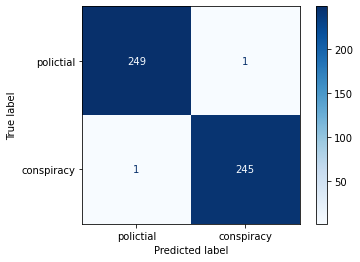

In [212]:
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe)
hyper_params = {
    'model__solver':['newton-cg', 'lbfgs', 'liblinear'],
    'model__C' : [0.4,0.5,1] # best params were 0.4-0.5 both previous times
}

gs_whole = GridSearchCV(pipe, hyper_params,cv=3)


gs_whole.fit(train_whole,y3_train)

print('best score',gs_whole.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole.best_params_)
print('train score',gs_whole.score(train_whole,y3_train))
print('test score',gs_whole.score(test_whole,y3_test))


plot_confusion_matrix(gs_whole,test_whole,y3_test,cmap='Blues',display_labels=['polictial','conspiracy']);

best score 1.0
best params {'model__C': 0.3, 'model__penalty': 'l2', 'model__solver': 'newton-cg'}
train score 1.0
test score 0.9959677419354839


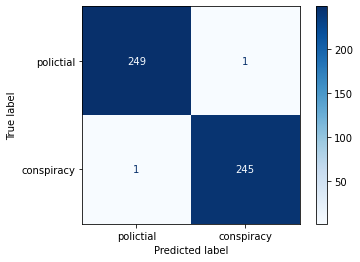

In [215]:
# check best solver and penalty (l2,none) that are appropriate for it (dropping alpha for none penaly since unnecessary)
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe)
hyper_params = {
    'model__penalty':['l2'], # 
    'model__solver':['newton-cg'], # 
    'model__C' : [0.3,0.4,0.45,0.5] # best params were 0.4-0.5 both previous times
}

gs_whole2 = GridSearchCV(pipe, hyper_params,cv=3)


gs_whole2.fit(train_whole,y3_train)

print('best score',gs_whole2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole2.best_params_)
print('train score',gs_whole2.score(train_whole,y3_train))
print('test score',gs_whole2.score(test_whole,y3_test))


plot_confusion_matrix(gs_whole2,test_whole,y3_test,cmap='Blues',display_labels=['polictial','conspiracy']);

best score 1.0
best params {'model__penalty': 'none', 'model__solver': 'newton-cg'}
train score 1.0
test score 1.0


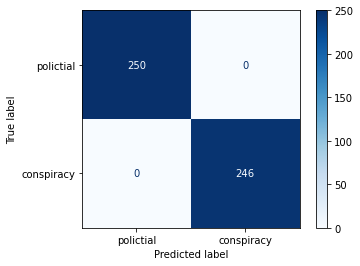

In [216]:
# check best solver and penalties that are appropriate for it
pipe  = Pipeline([ ('model', LogisticRegression(max_iter=10_000)) ])

# running with same inital pipe for Logistic Reg model (pipe)
hyper_params = {
    'model__penalty':['none'], # 
    'model__solver':['newton-cg'] # 
}

gs_whole2 = GridSearchCV(pipe, hyper_params,cv=3)


gs_whole2.fit(train_whole,y3_train)

print('best score',gs_whole2.best_score_) # best cross validated score (defualt logistic regression - accuracy)
print('best params',gs_whole2.best_params_)
print('train score',gs_whole2.score(train_whole,y3_train))
print('test score',gs_whole2.score(test_whole,y3_test))


plot_confusion_matrix(gs_whole2,test_whole,y3_test,cmap='Blues',display_labels=['polictial','conspiracy']);